In [1]:
import pandas as pd
from glob import glob

df = pd.concat(objs=[pd.read_csv(filepath_or_buffer=input_file, 
                                 parse_dates=['started_at', 'ended_at']
                                ) for input_file in glob('/kaggle/input/bike-share/*.csv')])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5779444 entries, 0 to 823487
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 617.3+ MB


In [2]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    857860
start_station_id      857992
end_station_name      915655
end_station_id        915796
start_lat                  0
start_lng                  0
end_lat                 5795
end_lng                 5795
member_casual              0
dtype: int64

In [3]:
df.nunique()

ride_id               5779444
rideable_type               3
started_at            4862473
ended_at              4875344
start_station_name       1820
start_station_id         1498
end_station_name         1821
end_station_id           1498
start_lat              772920
start_lng              730231
end_lat                 13720
end_lng                 13834
member_casual               2
dtype: int64

In [4]:
df.sample(n=10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
60595,2643FD491F9F8CC2,electric_bike,2023-06-02 18:06:01,2023-06-02 18:18:11,Columbus Dr & Randolph St,13263,Loomis St & Lexington St,13332,41.884550,-87.619571,41.872229,-87.661364,member
141074,15D78ADBB1EC7462,classic_bike,2023-04-08 10:48:32,2023-04-08 10:57:46,Clark St & Wrightwood Ave,TA1305000014,Clark St & Armitage Ave,13146,41.929546,-87.643118,41.918306,-87.636282,member
16372,0943D64FC7B3AEAA,electric_bike,2022-09-17 06:55:47,2022-09-17 07:04:29,NaN,NaN,NaN,NaN,41.920000,-87.770000,41.920000,-87.790000,casual
78364,A46537DF68F965A3,electric_bike,2023-01-02 23:29:45,2023-01-02 23:42:20,NaN,NaN,NaN,NaN,41.750000,-87.670000,41.770000,-87.650000,member
169740,83211F80FA18AFE3,classic_bike,2022-11-18 16:44:16,2022-11-18 17:08:48,Mies van der Rohe Way & Chestnut St,15529,LaSalle St & Illinois St,13430,41.898587,-87.621915,41.890762,-87.631697,casual
379401,9864DCACCBF9DC84,electric_bike,2023-04-06 17:30:18,2023-04-06 17:31:09,Sheridan Rd & Buena Ave,TA1309000027,Sheridan Rd & Buena Ave,TA1309000027,41.958510,-87.654954,41.958494,-87.654966,member
460821,83F945620FCB58A6,classic_bike,2022-10-16 16:49:05,2022-10-16 16:52:28,Shields Ave & 31st St,KA1503000038,Emerald Ave & 31st St,TA1309000055,41.838464,-87.635406,41.838198,-87.645143,member
129160,1FD4FA9528D0730C,electric_bike,2023-04-05 18:21:07,2023-04-05 18:28:41,Wood St & Webster Ave,TA1307000138,Ashland Ave & Blackhawk St,13224,41.921065,-87.672802,41.907066,-87.667252,casual
507057,58F219AD1B8DA8A2,electric_bike,2022-07-11 16:35:05,2022-07-11 16:47:30,NaN,NaN,Lincoln Ave & Waveland Ave,13253,41.940000,-87.710000,41.948797,-87.675278,casual
36063,25BAD74D7D3355FB,classic_bike,2022-08-28 14:50:21,2022-08-28 14:53:15,Shields Ave & 28th Pl,15443,Shields Ave & 31st St,KA1503000038,41.842733,-87.635491,41.838464,-87.635406,member


<Axes: >

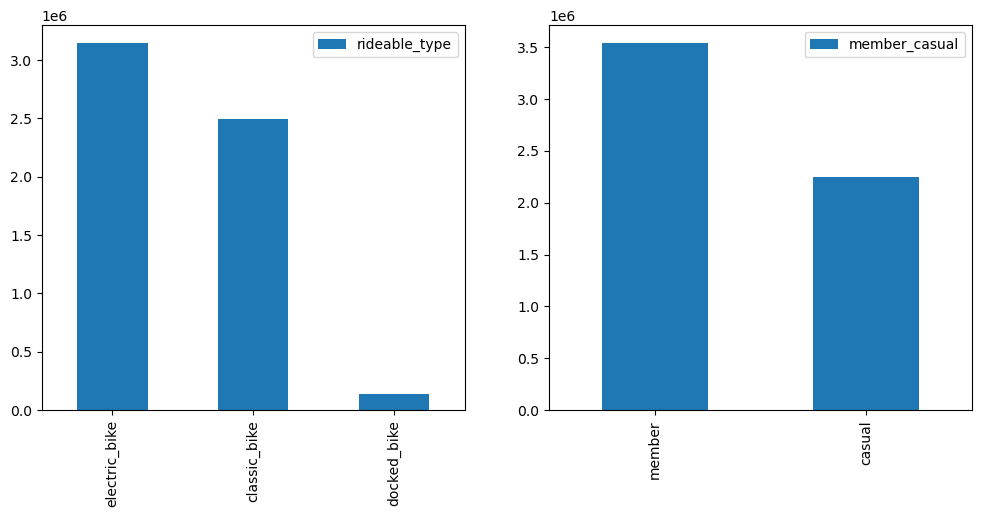

In [5]:
from matplotlib.pyplot import subplots
_, ax = subplots(figsize=(12, 5), ncols=2,)
df['rideable_type'].value_counts().plot(ax=ax[0], kind='bar', legend=True)
df['member_casual'].value_counts().plot(ax=ax[1], kind='bar', legend=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='rideable_type', ylabel='member_casual'>

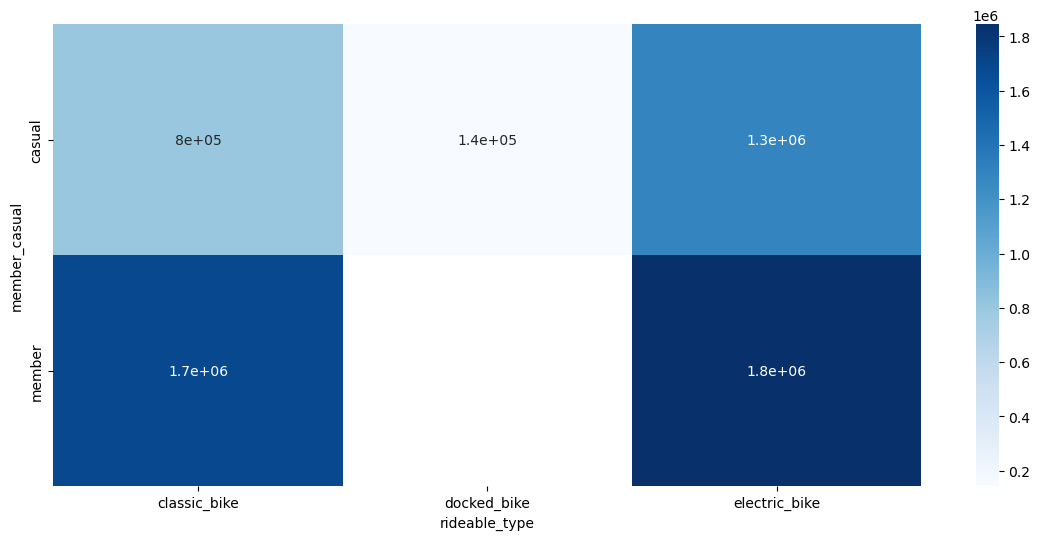

In [6]:
from seaborn import heatmap
_, ax = subplots(figsize=(14, 6),)
person_bike = ['rideable_type', 'member_casual']
heatmap(annot=True, cmap='Blues', data=pd.pivot_table(data=df[person_bike].groupby(person_bike).size().reset_index(),
                                          index=person_bike[1], columns=person_bike[0], values=0), square=False, )

These would probably look better as percentages instead of counts.

We expect the time variables to be really important here; let's try to make a time series plot of the whole dataset.

<Axes: xlabel='started_at'>

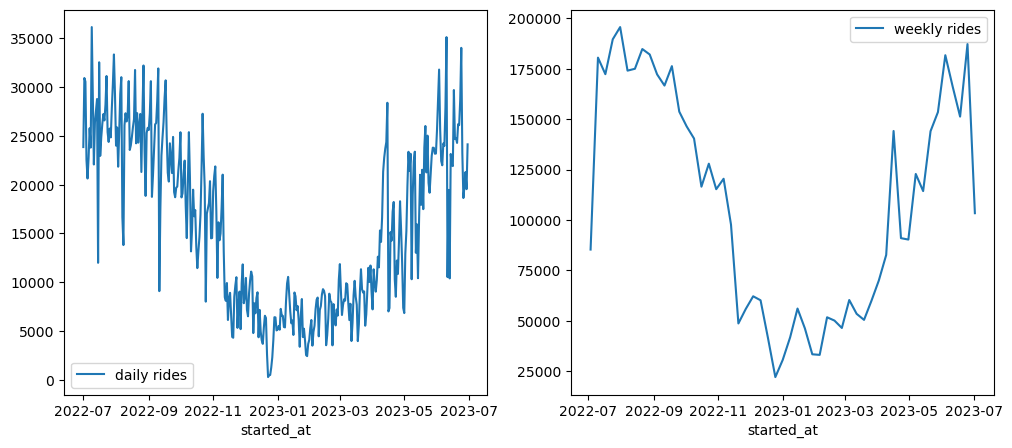

In [7]:
from seaborn import lineplot
_, ax=subplots(figsize=(12, 5), ncols=2, )
lineplot(ax=ax[0], data=df[['started_at']].groupby([pd.Grouper(key='started_at', freq='D'), ]).size().to_frame(name='daily rides'))
lineplot(ax=ax[1], data=df[['started_at']].groupby([pd.Grouper(key='started_at', freq='W'), ]).size().to_frame(name='weekly rides'))

We get the same basic shape for daily or weekly totals curves, both showing summer vs. winter seasonality, but the daily curve shows a lot more volatility.

<Axes: xlabel='start_lng', ylabel='start_lat'>

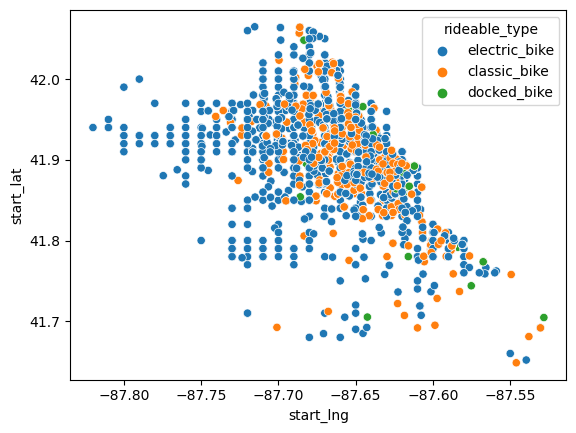

In [8]:
from seaborn import scatterplot
scatterplot(data=df.sample(n=10000), y='start_lat', x='start_lng', hue='rideable_type')

In [9]:
import plotly.graph_objects as go

sample_df = df.sample(n=50000)
fig = go.Figure(data=go.Scattergeo(
        lon = sample_df['start_lng'],
        lat = sample_df['start_lat'],
        text = sample_df['member_casual'],
        mode = 'markers',
#         marker_color = sample_df['rideable_type']
        ))

fig.update_layout(
        title = 'Bikes!',
        geo_scope='usa'
    )
fig.update_geos(fitbounds='locations')
fig.show()
